<font size=6>
EDA:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt

In [5]:
train=pd.read_csv('training.txt').drop(['date'], axis=1)
train

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.180000,27.272000,426.0,721.250000,0.004793,1
2,23.150000,27.267500,429.5,714.000000,0.004783,1
3,23.150000,27.245000,426.0,713.500000,0.004779,1
4,23.150000,27.200000,426.0,708.250000,0.004772,1
5,23.100000,27.200000,426.0,704.500000,0.004757,1
6,23.100000,27.200000,419.0,701.000000,0.004757,1
7,23.100000,27.200000,419.0,701.666667,0.004757,1
8,23.100000,27.200000,419.0,699.000000,0.004757,1
9,23.100000,27.200000,419.0,689.333333,0.004757,1
10,23.075000,27.175000,419.0,688.000000,0.004745,1


In [6]:
test=pd.read_csv('test.txt').drop(['date'], axis=1)
test

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,21.760000,31.133333,437.333333,1029.666667,0.005021,1
2,21.790000,31.000000,437.333333,1000.000000,0.005009,1
3,21.767500,31.122500,434.000000,1003.750000,0.005022,1
4,21.767500,31.122500,439.000000,1009.500000,0.005022,1
5,21.790000,31.133333,437.333333,1005.666667,0.005030,1
6,21.760000,31.260000,437.333333,1014.333333,0.005042,1
7,21.790000,31.197500,434.000000,1018.500000,0.005041,1
8,21.790000,31.393333,437.333333,1018.666667,0.005073,1
9,21.790000,31.317500,434.000000,1022.000000,0.005060,1
10,21.790000,31.463333,437.333333,1027.333333,0.005084,1


In [7]:
validation=pd.read_csv('validation.txt').drop(['date'], axis=1)
validation

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,23.754000,26.200000,488.600000,779.000000,0.004767,1
145,23.760000,26.260000,568.666667,790.000000,0.004779,1
146,23.730000,26.290000,536.333333,798.000000,0.004776,1
147,23.754000,26.290000,509.000000,797.000000,0.004783,1
148,23.754000,26.350000,476.000000,803.200000,0.004794,1
149,23.736000,26.390000,510.000000,809.000000,0.004796,1


Occupancy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temperature, dtype: object

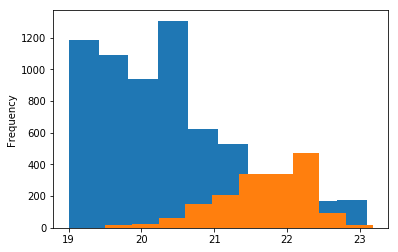

In [17]:
train.groupby('Occupancy')['Temperature'].plot(kind='hist')

Occupancy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Light, dtype: object

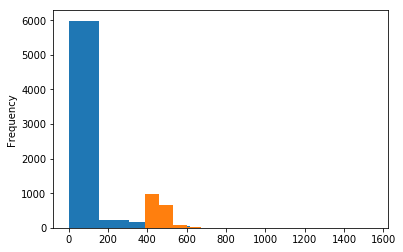

In [18]:
train.groupby('Occupancy')['Light'].plot(kind='hist')

Occupancy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Humidity, dtype: object

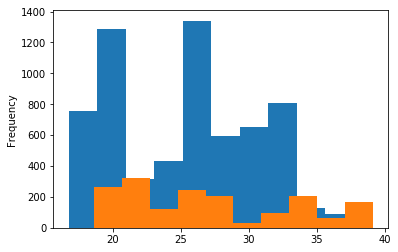

In [19]:
train.groupby('Occupancy')['Humidity'].plot(kind='hist')

Occupancy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HumidityRatio, dtype: object

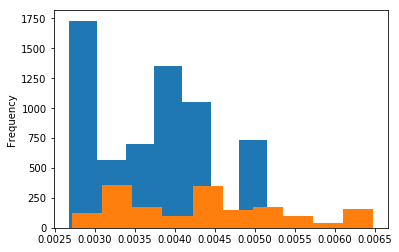

In [21]:
train.groupby('Occupancy')['HumidityRatio'].plot(kind='hist')

Occupancy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CO2, dtype: object

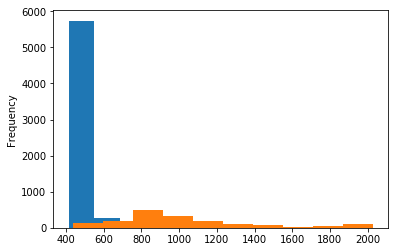

In [56]:
train.groupby('Occupancy')['CO2'].plot(kind='hist')

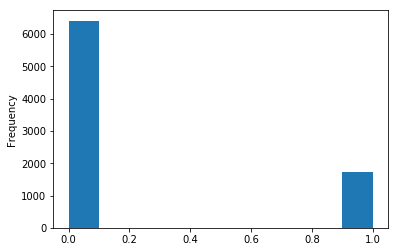

In [108]:
train['Occupancy'].plot(kind='hist')

<font size=6>
Making Model & Certification:

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
X=train.drop(['Occupancy'], axis=1)
y=train['Occupancy']
X_val=validation.drop(['Occupancy'], axis=1)
y_val=validation['Occupancy']
X_test=test.drop(['Occupancy'], axis=1)
y_test=test['Occupancy']

In [27]:
RF=RandomForestClassifier(n_estimators=100, max_features=1)
RF.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
def score(y_pred, y):
    count=0
    for i in range(y_pred.size):
        if y_pred[i]==y[i]:
            count +=1
    return count/y_pred.size
        

In [29]:
RF.score(X_val, y_val)

0.9606003752345216

In [30]:
RF.score(X_test, y_test)

0.9730311730926989

In [80]:
for i in range(1,6):
    score=0
    for j in range(0,100):
        reg1=RandomForestClassifier(n_estimators=100, max_features=i)
        reg1.fit(X,y)
        score +=reg1.score(X_val, y_val)
    print('m=', i, score/100)

m= 1 0.955924953095685
m= 2 0.9487654784240148
m= 3 0.9391894934333956
m= 4 0.9360225140712946
m= 5 0.9363789868667921


In [31]:
def navie(X):
    result=[]
    for i in X.index:
        if X.loc[i, 'Light']<400:
            result.append(0)
        else:
            result.append(1)
    return np.array(result)

In [52]:
result=navie(X_test)


In [53]:
score(result, y_test.values)

0.9929245283018868

In [34]:
from sklearn.svm import LinearSVC
SVC=LinearSVC(C=2)

In [45]:
SVC.fit(X,y)

c:\users\yihengye\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [46]:
SVC.score(X_test,y_test)

0.9929245283018868

In [47]:
SVC.score(X_val, y_val)

0.9786116322701689

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis(solver='lsqr', priors=np.array([0.99,0.01]))

In [39]:
LDA.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=array([0.99, 0.01]),
                           shrinkage=None, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [40]:
LDA.score(X_test, y_test)

0.992104183757178

In [41]:
LDA.score(X_val, y_val)

0.9782363977485928

In [106]:
train['Occupancy'].value_counts()/len(train)

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

In [48]:
def report(y_pred, y):
    result={}
    result['occupied']={}
    result['empty']={}
    result['occupied']['actual']=0
    result['empty']['actual']=0
    result['occupied']['true prediction']=0
    result['empty']['true prediction']=0
    result['occupied']['false prediction']=0
    result['empty']['false prediction']=0
    for i in range(y_pred.size):
        if y[i]==1:
            result['occupied']['actual'] +=1
            if y_pred[i]==1:
                result['occupied']['true prediction'] +=1
            else:
                result['occupied']['false prediction'] +=1
        else:
            result['empty']['actual'] +=1
            if y_pred[i]==0:
                result['empty']['true prediction'] +=1
            else:
                result['empty']['false prediction'] +=1
    return pd.DataFrame(result)

            
            
    

In [50]:
report(RF.predict(X_test), y_test.values)

,occupied,empty
actual,2049,7703
false prediction,40,223
true prediction,2009,7480


In [54]:
report(result, y_test.values)

,occupied,empty
actual,2049,7703
false prediction,24,45
true prediction,2025,7658


In [55]:
report(SVC.predict(X_test), y_test.values)

,occupied,empty
actual,2049,7703
false prediction,13,56
true prediction,2036,7647


In [56]:
report(LDA.predict(X_test), y_test.values)

,occupied,empty
actual,2049,7703
false prediction,13,64
true prediction,2036,7639
